# Face Recognition using Openface

## KHU, SWCON, Bomin-Seo

References :
https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c

## Preprocessing

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import face_recognition
from skimage.feature import hog
from skimage import data, exposure, io
import dlib
import numpy as np
import cv2
import openface
import glob
import sys

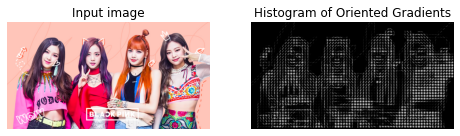

In [2]:
image = io.imread("https://img2.sbs.co.kr/img/sbs_cms/WE/2020/07/09/WE64849959_ori.jpg")
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [3]:
face_detector = dlib.get_frontal_face_detector()
win = dlib.image_window()
detected_faces = face_detector(image, 1)
print("I found {} faces in the file {}".format(len(detected_faces), ""))
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)

dlib.hit_enter_to_continue()

I found 4 faces in the file 


In [4]:
face_detector = dlib.get_frontal_face_detector()
win = dlib.image_window()
detected_faces = face_detector(image, 1)
print("I found {} faces in the file {}".format(len(detected_faces), ""))
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)

dlib.hit_enter_to_continue()

I found 4 faces in the file 


A face is located at pixel location Top: 152, Left: 187, Bottom: 259, Right: 294
A face is located at pixel location Top: 152, Left: 438, Bottom: 259, Right: 545
A face is located at pixel location Top: 140, Left: 915, Bottom: 247, Right: 1023
A face is located at pixel location Top: 140, Left: 677, Bottom: 247, Right: 784


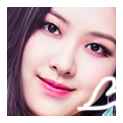

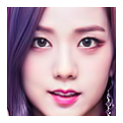

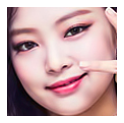

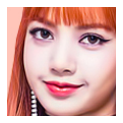

In [5]:
face_locations = face_recognition.face_locations(image)
face_images = []
for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    #pil_image.show()
    face_images.append(pil_image)
for i in range(len(face_images)):
    face_image1 = face_images[i]
    fig, face_image1 = plt.subplots(figsize=(2, 2), sharex=True, sharey=True)
    face_image1.axis('off')
    face_image1.imshow(face_images[i], cmap=plt.cm.gray)
    i += 1

In [6]:
predictor_model = "shape_predictor_68_face_landmarks.dat"
face_pose_predictor = dlib.shape_predictor(predictor_model)
win = dlib.image_window()
detected_faces = face_detector(image, 1)
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)
    pose_landmarks = face_pose_predictor(image, face_rect)
    win.add_overlay(pose_landmarks)      
dlib.hit_enter_to_continue()

In [7]:
import openface.openface.align_dlib as openface

face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
face_aligner = openface.AlignDlib(predictor_model)

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)
# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):
    pose_landmarks = face_pose_predictor(image, face_rect)
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

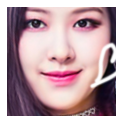

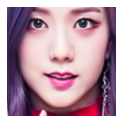

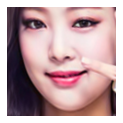

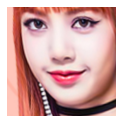

In [9]:
alignedFace_images = [cv2.imread(file) for file in glob.glob("C:/Users/sbm78/face_recognition/*.jpg")]
for i in range(len(alignedFace_images)):
    alignedFace_image = alignedFace_images[i]
    fig, alignedFace_image = plt.subplots(figsize=(2, 2), sharex=True, sharey=True)
    alignedFace_image.axis('off')
    alignedFace_image.imshow(alignedFace_images[i], cmap=plt.cm.gray)
    i += 1

# Embedding

In [10]:
!docker pull bamos/openface
!docker image ls

Using default tag: latest
latest: Pulling from bamos/openface
6599cadaf950: Pulling fs layer
23eda618d451: Pulling fs layer
f0be3084efe9: Pulling fs layer
52de432f084b: Pulling fs layer
a3ed95caeb02: Pulling fs layer
1a2a2352384d: Pulling fs layer
52de432f084b: Waiting
b3aa7028fd4a: Pulling fs layer
521d576bcc13: Pulling fs layer
13b5061d177e: Pulling fs layer
a3ed95caeb02: Waiting
22d240e00c6e: Pulling fs layer
43876631ca7b: Pulling fs layer
9f56151f62c6: Pulling fs layer
cf7fdb827566: Pulling fs layer
6159137ea736: Pulling fs layer
6f95845cbfa1: Pulling fs layer
04cd24b5af9e: Pulling fs layer
22d240e00c6e: Waiting
1a2a2352384d: Waiting
43876631ca7b: Waiting
cf7fdb827566: Waiting
9f56151f62c6: Waiting
b3aa7028fd4a: Waiting
6159137ea736: Waiting
521d576bcc13: Waiting
6f95845cbfa1: Waiting
13b5061d177e: Waiting
04cd24b5af9e: Waiting
23eda618d451: Verifying Checksum
23eda618d451: Download complete
f0be3084efe9: Download complete
52de432f084b: Download complete
a3ed95caeb02: Download comp

----------------------------------------------------------------------------
명령 프롬프트에서 다음의 명령을 입력합니다. \
docker run -p 9000:9000 -p 8000:8000 -t -i --name training bamos/openface /bin/bash \
cd /root/openface
--------------------------------------------------------------------------

In [11]:
!docker container ls

CONTAINER ID   IMAGE            COMMAND       CREATED          STATUS          PORTS                                                                                  NAMES
4c2154cdd6e3   bamos/openface   "/bin/bash"   36 seconds ago   Up 35 seconds   0.0.0.0:8000->8000/tcp, :::8000->8000/tcp, 0.0.0.0:9000->9000/tcp, :::9000->9000/tcp   training


In [12]:
!docker cp C:/Users/sbm78/face_recognition/training-images training:/root/openface

----------------------------------------------------------------------------
명령 프롬프트에서 다음의 명령을 입력합니다. \
./util/align-dlib.py ./training-images/ align outerEyesAndNose ./aligned-images/ --size 96 \
./batch-represent/main.lua -outDir ./generated-embeddings/ -data ./aligned-images/
--------------------------------------------------------------------------

In [28]:
!docker cp training:/root/openface/generated-embeddings/ C:/Users/sbm78/face_recognition

Error: No such container:path: training:/root/openface/generated-embeddings/


# Face Recognition

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import pandas as pd
X = pd.read_csv("generated-embeddings/reps.csv")
y = pd.read_csv("generated-embeddings/labels.csv")
X = X[:]
y = y['1']

x_train, x_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.1, stratify=y, random_state=123)

In [19]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [20]:
param_grid = { 'C': np.arange(10,12,0.01)}
grid = GridSearchCV(clf, param_grid = param_grid,
                     cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state = 123),
                     return_train_score=True)
grid.fit(x_train,y_train)
print(f"best parameters: {grid.best_params_}")
print(f"test-set score: {grid.score(x_test, y_test):.3f}")

best parameters: {'C': 10.549999999999988}
test-set score: 0.846


In [17]:
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)
param_grid = { 'alpha': np.arange(0.001,1,0.001)}
grid2 = GridSearchCV(clf2, param_grid = param_grid,
                     cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state = 123),
                     return_train_score=True)
grid2.fit(x_train,y_train)
print(f"best parameters: {grid2.best_params_}")
print(f"test-set score: {grid2.score(x_test, y_test):.3f}")

best parameters: {'alpha': 0.005}
test-set score: 0.846


In [18]:
from sklearn.neighbors import NearestCentroid

clf3 = NearestCentroid()
param_grid = { 'shrink_threshold': np.arange(0.001,1,0.001)}
grid3 = GridSearchCV(clf3, param_grid = param_grid,
                     cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state = 123),
                     return_train_score=True)
grid3.fit(x_train,y_train)
print(f"best parameters: {grid3.best_params_}")
print(f"test-set score: {grid3.score(x_test, y_test):.3f}")

best parameters: {'shrink_threshold': 0.681}
test-set score: 0.846


In [23]:
!docker container stop training
!docker container ls -a

Error response from daemon: No such container: training


CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES


In [24]:
!docker cp C:/Users/sbm78/face_recognition/test-images test:/root/openface

In [29]:
!docker cp test:/root/openface/generated-embeddings/ C:/Users/sbm78/face_recognition

In [30]:
X_test = pd.read_csv("generated-embeddings/reps.csv")

EmptyDataError: No columns to parse from file